<a href="https://colab.research.google.com/github/prithviemmidi/Dissertation/blob/main/CIFAR10_Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras import datasets, models, layers, regularizers
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from tensorflow.keras.layers import Dropout

In [2]:
data = tf.keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])
    return model

In [6]:
def build_l2_model():
    l2 = tf.keras.regularizers.l2(0.001)
    return tf.keras.models.Sequential([
        tf.keras.Input(shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2),
        tf.keras.layers.Dense(10, activation='softmax')])

In [7]:
def build_l1_model():
    l1 = tf.keras.regularizers.l1(0.001)
    return tf.keras.models.Sequential([
        tf.keras.Input(shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l1),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l1),
        tf.keras.layers.Dense(10, activation='softmax')])

In [8]:
def build_dropout_model():
    return tf.keras.models.Sequential([
        tf.keras.Input(shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
regularisation_models = {
    "No Regularisation": build_model,
    "L1": build_l1_model,
    "L2": build_l2_model,
    "Dropout": build_dropout_model}

optimisers = {
    "RMSprop": lambda: RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-8),
    "Adam": lambda: Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)}

results = []
histories = {}

In [10]:
for reg_name, build_fn in regularisation_models.items():
    for opt_name, opt_fn in optimisers.items():
        model = build_fn()
        model.compile(optimizer = opt_fn(),
                      loss = 'sparse_categorical_crossentropy',
                      metrics = ['accuracy'])

        history = model.fit(
            train_images, train_labels,
            validation_split=0.2,
            epochs=10,
            batch_size=100)

        histories[f"{reg_name}_{opt_name}"] = history

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2743 - loss: 2.0046 - val_accuracy: 0.5207 - val_loss: 1.3532
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5359 - loss: 1.3120 - val_accuracy: 0.6164 - val_loss: 1.0888
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6280 - loss: 1.0606 - val_accuracy: 0.6236 - val_loss: 1.0966
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6866 - loss: 0.8916 - val_accuracy: 0.6490 - val_loss: 1.0223
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7465 - loss: 0.7289 - val_accuracy: 0.6804 - val_loss: 0.9177
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7921 - loss: 0.5966 - val_accuracy: 0.7124 - val_loss: 0.8567
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8350 - loss: 0.4816 - val_accuracy: 0.6968 - val_loss: 0.9409
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8768 - loss: 0.3597 - val_accuracy: 0.

In [11]:
for key, history in histories.items():
    reg_name, opt_name = key.split("_", 1)

    best_val_acc = max(history.history['val_accuracy'])
    best_train_acc = max(history.history['accuracy'])

    results.append({
        "Regularisation": reg_name,
        "Optimiser": opt_name,
        "Best Training Accuracy": round(best_train_acc, 4),
        "Best Validation Accuracy": round(best_val_acc, 4)})

In [12]:
results_df = pd.DataFrame(results)
print(results_df)

      Regularisation Optimiser  Best Training Accuracy  \
0  No Regularisation   RMSprop                  0.9361   
1  No Regularisation      Adam                  0.8896   
2                 L1   RMSprop                  0.1012   
3                 L1      Adam                  0.1006   
4                 L2   RMSprop                  0.7017   
5                 L2      Adam                  0.7255   
6            Dropout   RMSprop                  0.7461   
7            Dropout      Adam                  0.7366   

   Best Validation Accuracy  
0                    0.7168  
1                    0.7301  
2                    0.0980  
3                    0.1022  
4                    0.6830  
5                    0.6951  
6                    0.7268  
7                    0.7296  


In [13]:
# Validation Accuracy

validation_acc = results_df.pivot(index = "Optimiser", columns = "Regularisation", values = "Best Validation Accuracy")
print(validation_acc)

Regularisation  Dropout      L1      L2  No Regularisation
Optimiser                                                 
Adam             0.7296  0.1022  0.6951             0.7301
RMSprop          0.7268  0.0980  0.6830             0.7168


In [14]:
# Training Accuracy

training_acc = results_df.pivot(index = "Optimiser", columns = "Regularisation", values = "Best Training Accuracy")
print(training_acc)

Regularisation  Dropout      L1      L2  No Regularisation
Optimiser                                                 
Adam             0.7366  0.1006  0.7255             0.8896
RMSprop          0.7461  0.1012  0.7017             0.9361


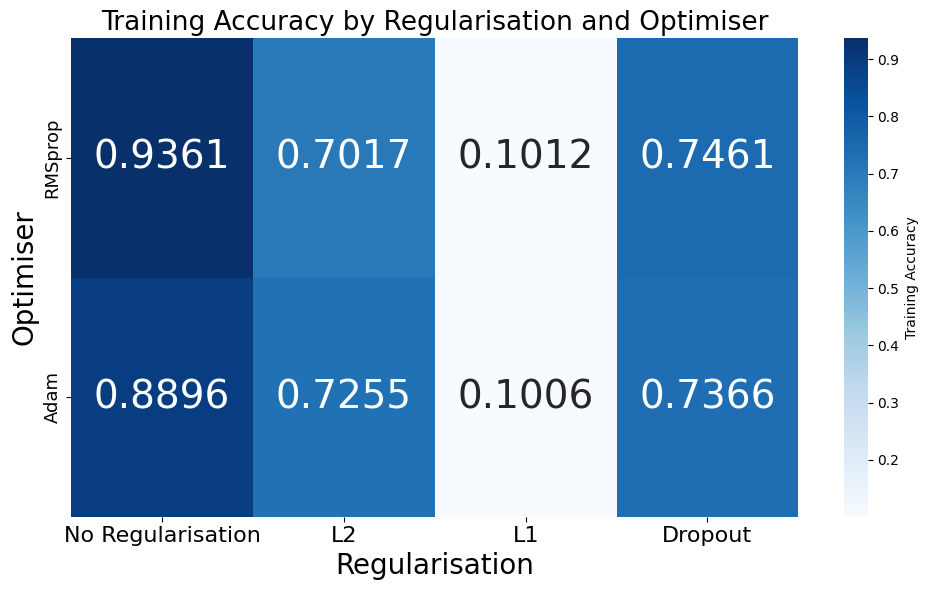

In [15]:
row_order = ["RMSprop", "Adam"]
col_order = ["No Regularisation", "L2", "L1", "Dropout"]
pivot_order = results_df.pivot(index = "Optimiser", columns = "Regularisation", values = "Best Training Accuracy")
pivot_order = pivot_order.reindex(index=row_order, columns=col_order)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_order,
    annot=True,
    fmt=".4f",
    cmap="Blues",
    cbar_kws={'label': 'Training Accuracy'},
    annot_kws={"size": 28})

plt.title("Training Accuracy by Regularisation and Optimiser", fontsize=19)
plt.xlabel("Regularisation", fontsize=20)
plt.ylabel("Optimiser", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

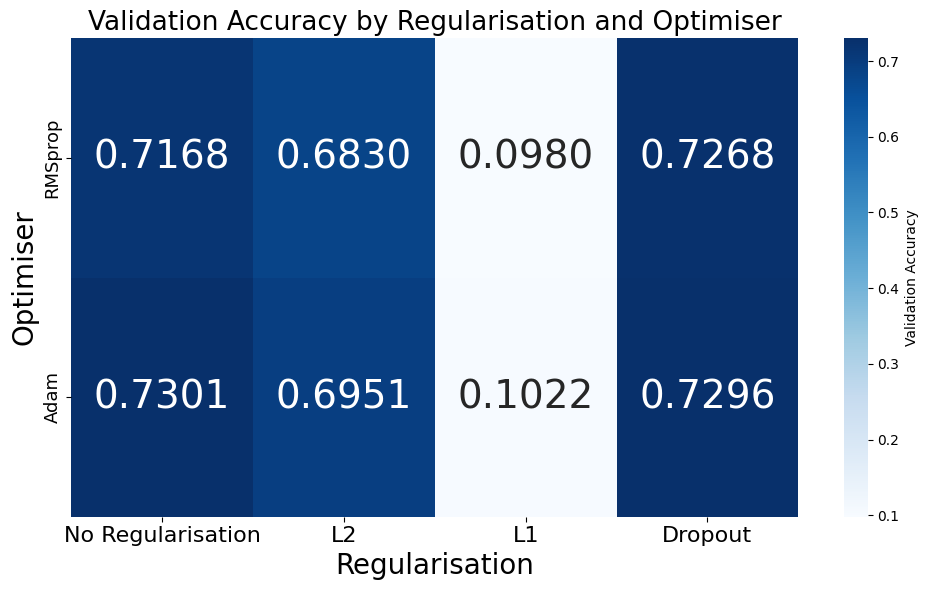

In [16]:
row_order = ["RMSprop", "Adam"]
col_order = ["No Regularisation", "L2", "L1", "Dropout"]
pivot_order2 = results_df.pivot(index="Optimiser", columns="Regularisation", values="Best Validation Accuracy")
pivot_order2 = pivot_order2.reindex(index = row_order, columns = col_order)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_order2,
    annot=True,
    fmt=".4f",
    cmap="Blues",
    cbar_kws={'label': 'Validation Accuracy'},
    annot_kws={"size": 28})

plt.title("Validation Accuracy by Regularisation and Optimiser", fontsize=19)
plt.xlabel("Regularisation", fontsize=20)
plt.ylabel("Optimiser", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()